In [1]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Yannis Laaroussi - Fabio Palmisano - Vincent Roh - Alexi Semiz -*-
# -*- date : 2023-11-15 -*-
# -*- Last revision: 2023-11-15 -*-
# -*- python version : 3.9.13 -*-
# -*- Description: Main Containing all the meaningfull results -*-

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from statsmodels.stats import diagnostic
from datetime import datetime
from scipy import stats
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
#import functions
from read.read_functions import *
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

#import cleaning functions
from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

#import functions for the analysis
from compute_experts import *

---
# Download and save datas
### Data paths

In [5]:
#Data paths for raw files
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'
rate_beer_ratings = rate_beer_path + 'ratings.txt'
rate_beer_reviews = rate_beer_path + 'reviews.txt'

contries_path = '../datas/countries/countries.csv'


In [6]:
#data paths for pickle files
beer_advocate_path_pickle = '../datas/BeerAdvocate/pickles/df_advocate_'
matched_beer_data_path_pickle = '../datas/matched_beer_data/pickles/df_matched_beer_'
rate_beer_path_pickle = '../datas/RateBeer/pickles/df_rate_beer_'

advocate_beers_path_pickle = beer_advocate_path_pickle + 'beers.pkl'
advovate_breweries_path_pickle = beer_advocate_path_pickle + 'breweries.pkl'
advocate_ratings_path_pickle = beer_advocate_path_pickle + 'ratings.pkl'
advocate_reviews_path_pickle = beer_advocate_path_pickle + 'reviews.pkl'
advocate_users_path_pickle = beer_advocate_path_pickle + 'users.pkl'

matched_beer_beers_pickle = matched_beer_data_path_pickle + 'beers.pkl'
matched_beer_breweries_pickle = matched_beer_data_path_pickle + 'breweries.pkl'
matched_beer_ratings_ba_pickle = matched_beer_data_path_pickle + 'ratings_ba.pkl'
matched_beer_ratings_rb_pickle = matched_beer_data_path_pickle + 'ratings_rb.pkl'
matched_beer_ratings_pickle = matched_beer_data_path_pickle + 'ratings.pkl'
matched_beer_users_approx_pickle = matched_beer_data_path_pickle + 'users_approx.pkl'
matched_beer_users_pickle = matched_beer_data_path_pickle + 'users.csv'

rate_beer_beers_pickle = rate_beer_path_pickle + 'beers.pkl'
rate_beer_breweries_pickle = rate_beer_path_pickle + 'breweries.pkl'
rate_beer_users_pickle = rate_beer_path_pickle + 'users.pkl'
rate_beer_ratings_pickle = rate_beer_path_pickle + 'ratings.pkl'
rate_beer_reviews_pickle = rate_beer_path_pickle + 'reviews.pkl'

In [7]:
#Define list of datas for each website
datas_matched_beer_names = [
    'df_matched_beer_beers',
    'df_matched_beer_breweries',
    'df_matched_beer_ratings_ba',
    'df_matched_beer_ratings_rb',
    'df_matched_beer_ratings',
    'df_matched_beer_users_approx',
    'df_matched_beer_users'
    ]
datas_advocate_names = [
    'df_advocate_beers',
    'df_advocate_breweries',
    'df_advocate_ratings',
    'df_advocate_reviews',
    'df_advocate_users'
    ]
datas_rate_beer_names = [
    'df_rate_beer_beers',
    'df_rate_beer_breweries',
    'df_rate_beer_users',
    'df_rate_beer_ratings',
    'df_rate_beer_reviews'
    ]

## import datas
### Raw Format
$\color{Red}{\text{Attention}}$ : Run the celluls in this section only if the datasets stored as pickle are not available.

In [ ]:
#import datas from Advovate Beer
df_advocate_beers = pd.read_csv(advocate_beers_path, sep=',')
df_advocate_breweries = pd.read_csv(advovate_breweries_path, sep=',')
df_advocate_ratings = read_txt(advocate_ratings_path)
df_advocate_reviews = read_txt(advocate_reviews_path)
df_advocate_users = pd.read_csv(advocate_users_path, sep=',')

In [ ]:
#import datas from Matched Beer
df_matched_beer_beers = pd.read_csv(matched_beer_beers, sep=',')
df_matched_beer_breweries = pd.read_csv(matched_beer_breweries, sep=',')
df_matched_beer_ratings_ba = read_txt(matched_beer_ratings_ba)
df_matched_beer_ratings_rb = read_txt(matched_beer_ratings_rb)
df_matched_beer_ratings = pd.read_csv(matched_beer_ratings, sep=',')
df_matched_beer_users_approx = pd.read_csv(matched_beer_users_approx)
df_matched_beer_users = pd.read_csv(matched_beer_users)

In [ ]:
#import datas from Rate Beer
df_rate_beer_beers = pd.read_csv(rate_beer_beers, sep=',')
df_rate_beer_breweries = pd.read_csv(rate_beer_breweries, sep=',')
df_rate_beer_users = pd.read_csv(rate_beer_users, sep=',')
df_rate_beer_ratings = read_txt(rate_beer_ratings)
df_rate_beer_reviews = read_txt(rate_beer_reviews)

### Pickle Format

In [8]:
#import raw data sets
df_matched_beer_beers, df_matched_beer_breweries, df_matched_beer_ratings_ba, df_matched_beer_ratings_rb, df_matched_beer_ratings, df_matched_beer_users_approx, df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_advocate_beers, df_advocate_breweries, df_advocate_ratings, df_advocate_reviews, df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_reviews...


## Store dataFrame (Pickle format)
Use this section to store the datasets in pickle (normally done once)

In [ ]:
#define list of datas for each website
datas_rate_beer = [df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews]
datas_matched_beer = [df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users]
datas_advocate_beer = [df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users]

In [ ]:
#Saving datas
save_datas('RateBeer', datas_rate_beer,datas_rate_beer_names)
save_datas('matched_beer_data', datas_matched_beer,datas_matched_beer_names)
save_datas('BeerAdvocate', datas_advocate_beer,datas_advocate_names)

---
# Initial data analysis
## 0. Preprocessing datasets

In [9]:
# Clean datasets
df_matched_beer_users = clean_mb_users(df_matched_beer_users)
df_advocate_users = clean_advocate_users(df_advocate_users)
df_rate_beer_users = clean_rb_users(df_rate_beer_users)
df_advocate_ratings = clean_advocate_ratings(df_advocate_ratings)
df_rate_beer_ratings = clean_rb_ratings(df_rate_beer_ratings)

*  A first merge is performed on user's datasets in order to have a single dataFrame. 
* Another merge is performed on ratings (for both Advocate and Rate Beer) to obtain a single dataFrame

In [10]:
df_all_users = create_all_users(df_matched_beer_users,df_advocate_users,df_rate_beer_users)
df_ratings_stats = create_ratings_stat(df_matched_beer_ratings,df_advocate_ratings,df_rate_beer_ratings)

Loading the dataframe in pickle format from  ../datas/results/
Loading the dataframe in pickle format from  ../datas/results/


## 1 Diving in the datas
### 1.1 Distribution of the number of ratings per user

In [11]:
ratings_per_user = pd.DataFrame({'nbr_ratings':df_ratings_stats.groupby('user_id')['user_id'].count()})

In [12]:
ratings_per_user.describe()

,nbr_ratings
count,220796.000000
mean,66.594748
std,429.733452
min,1.000000
25%,1.000000
50%,3.000000
75%,13.000000
max,43251.000000


/Users/vincentroduit/.pyenv/versions/3.9.13/envs/scientific/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vincentroduit/.pyenv/versions/3.9.13/envs/scientific/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vincentroduit/.pyenv/versions/3.9.13/envs/scientific/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vincentroduit/.pyenv/versions/3.9.13/envs/scientific/lib/python3.9/site-packages/seaborn/_

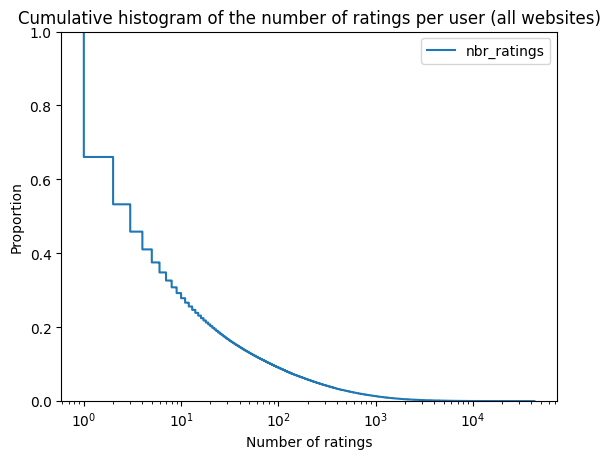

In [13]:
sns.ecdfplot(ratings_per_user, label="nbr_ratings", complementary=True)
plt.title('Cumulative histogram of the number of ratings per user (all websites)')
plt.xlabel('Number of ratings')
plt.ylabel('Proportion')
plt.semilogx()
plt.show()

The distribution has a heavy tail, indicating that there are numerous users who have posted only a few ratings, and conversely, a small number of users who are prolific raters. This observation motivates us to delve deeper into understanding the distinctions between these prolific raters and the rest of the user population.

#### 1.1.a) Define who is a massive rater 
In order to separate people in two group, a definition of a massive rater, called from now an "expert" has to be found. The choice was made here to consider the number of ratings per year and aggregate scores from the past 3 years with the formula:
$$
R_{Y_j} = 2 * R_{Y_{j}} + 0.5 * R_{Y_{j-1}} + 0.25 * R_{Y_{j-2}} + 0.1 * R_{Y_{j-3}}
$$
, where $R_{Y_j}$ denotes the number of ratings for the year j.
This value is then normalized between zero and one with a Min-Max scaling. Finally, a person is classified as an expert if its value is greater than a threshold sets at 0.2

In [14]:
#define the expert users
df_ratings_stat_expert, df_ratings_stat_pivot = compute_experts_table(df_ratings_stats, threshold=0.2)
df_ratings_stat_expert.head()

,user_id,year,nb_ratings,is_expert
0,2,2000,44,False
1,2,2001,4,False
2,2,2002,1,False
3,3,2000,94,False
4,3,2001,69,False


In [15]:
df_expert_per_year = df_ratings_stat_expert.groupby('year').apply(lambda x: sum(x['is_expert']))

### 1.2. Analysis of the behavior of the two categories
#### 1.2.a) Mean of the ratings

The purpose of this section is to analyze if the experts are more severe than the rest of the population on the global rating (column 'rating' in the DataFrame).

In [21]:
avg_ratings_expert = []
avg_ratings_normal = []
ttest_expert_normal = []

interest_years = sorted([year for year in df_ratings_stats.year.unique() if year > 2002])

for year in interest_years:
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    avg_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    ttest = stats.ttest_ind(df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'], df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'])
    ttest_expert_normal.append(ttest)
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

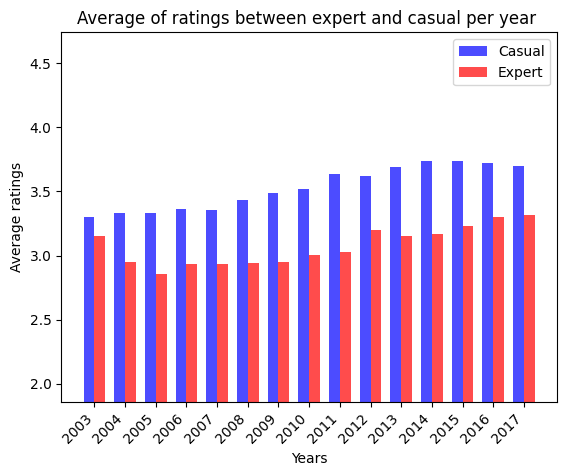

In [25]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casual', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Expert', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between expert and casual per year ')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

From this graph it is clear that the expert are more severe, but let's verify with the mean of a T-Test.

In [24]:
for year in range(len(ttest_expert_normal)):
    if ttest_expert_normal[year][1] < 0.05:
        print(f'The p-value for the year {interest_years[year]} is {ttest_expert_normal[year][1]:.2e}')

The p-value for the year 2003 is 1.78e-79
The p-value for the year 2004 is 0.00e+00
The p-value for the year 2005 is 0.00e+00
The p-value for the year 2006 is 0.00e+00
The p-value for the year 2007 is 0.00e+00
The p-value for the year 2008 is 0.00e+00
The p-value for the year 2009 is 0.00e+00
The p-value for the year 2010 is 0.00e+00
The p-value for the year 2011 is 0.00e+00
The p-value for the year 2012 is 0.00e+00
The p-value for the year 2013 is 0.00e+00
The p-value for the year 2014 is 0.00e+00
The p-value for the year 2015 is 0.00e+00
The p-value for the year 2016 is 0.00e+00
The p-value for the year 2017 is 0.00e+00


The t-test tells that the hypothesis H0, under which the mean for the two groups are equals, can be rejected.

#### 1.2.b) Top 10 rated beers

Now, the assessment focuses on whether experts and the general population share similar preferences when it comes to rating beers. For this investigation, the beers are sorted based on the number of times they were rated. A comparison is then made between the top 10 beers for the two groups.

In [84]:
df_top_10_experts = pd.DataFrame()
df_top_10_rest = pd.DataFrame()

interest_years = sorted([year for year in df_ratings_stats.year.unique() if year > 2002])

for year in interest_years:
    top_10_rest = []
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    top_10_rest = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)].copy()
    top_10_rest = top_10_rest.groupby('beer_id').agg({'rating': 'count', 'beer_name': 'first'})
    top_10_rest = top_10_rest.sort_values(by='rating', ascending=False).head(10)

    df_top_10_rest[f'{year}'] = top_10_rest['beer_name'].values
    top_10_experts = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)].copy()
    top_10_experts = top_10_experts.groupby('beer_id').agg({'rating': 'count', 'beer_name': 'first'})
    top_10_experts = top_10_experts.sort_values(by='rating', ascending=False).head(10)
    df_top_10_experts[f'{year}'] = top_10_experts['beer_name'].values

In [88]:
similarity = {}
for col in df_top_10_experts.columns:
    value = df_top_10_experts[col].isin(df_top_10_rest[col]).sum()
    similarity[col] = value

In [89]:
similarity

{'2003': 0,
 '2004': 0,
 '2005': 1,
 '2006': 0,
 '2007': 0,
 '2008': 0,
 '2009': 0,
 '2010': 0,
 '2011': 0,
 '2012': 0,
 '2013': 0,
 '2014': 0,
 '2015': 0,
 '2016': 0,
 '2017': 0}

In [106]:
df_top_10_experts.loc[df_top_10_experts['2005'].isin(df_top_10_rest['2005'])]['2005']

0    Great Divide Yeti Imperial Stout - Oak Aged
Name: 2005, dtype: object

In [107]:
df_top_10_rest.loc[df_top_10_rest['2005'].isin(df_top_10_experts['2005'])]['2005']

7    Great Divide Yeti Imperial Stout - Oak Aged
Name: 2005, dtype: object

Over the years under consideration, a beer is present in both groups only in 2005. This particular beer, namely ``Great Divide Yeti Imperial Stout - Oak Aged`` secured the top ranking in the expert group and the seventh position in the rest of the ratings.

#### 1.2.c) 